In [1]:
import gpytorch
import pyreadr
from sklearn import preprocessing
import R_to_python_functions_analysis as RPY
#import hyperparameter_runner
import json
import pickle
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
lookup = RPY.get_user_ids()
rlookup = {v:k for k,v in lookup.items()}
uls = lookup.keys()

In [85]:
np.array([(170*.49+50*.2)/220,.42,(0.06*150+.28*50)/175,0,0,(15*.8+50*.16)/65,0,\
          (50*.22+95*.55)/145,0.04,.24,.2,0,((.1*50+.31*170)/221),.314,.18,\
          ((.28*45+50*.12)/95),((180*.1+50*.06)/230)]).mean()

0.1906822634779111

In [80]:
((170*.49+50*.2)/220+(.42)+(0.06*150+.28*50)/175+(0)+0+(15*.8+50*.16)/65+0+(50*.22+95*.55)/145+0.04+.24+.2\
+0+((.1*50+.31*170)/221)+.314+.18+((.28*45+50*.12)/95)+((180*.1+50*.06)/230))/17

0.1906822634779111

In [3]:
X = RPY.combine_users('./data',uls)

10041
229
10365
72
10336
44
10355
173
10194
103
10352
63
10339
109
10313
153
10062
202
10259
50
10234
109
10269
111
10215
18
10271
227
10304
85
10395
67
10360
95
10152
142
10374
194
10237
263
avail test
0.22160223196492626


In [7]:
def get_users_data(X):
    user = None
    to_return = {}
    for u_i in range(len(X[0])):
        user_id = X[0][u_i]
        loc = X[4][u_i]
        if user_id!=user:
            user=user_id
        if user not in to_return:
            to_return[user]=[[],[]]
        to_return[user][0].append(X[1][u_i])
        to_return[user][1].append(loc)
    return to_return

In [6]:
X[0]

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 17,
 17,
 17,
 17,
 17,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 4,
 4,
 4,
 4,
 4,
 

In [14]:
with open('data/test.pkl','rb') as f:
    test = pickle.load(f)

In [8]:
def get_user_policy(user_id):
    username = lookup[user_id]
    #file_path = 'data/user{}_pooled_params/mu_beta.csv'.format(username)
    return test[username][0]

In [9]:
by_users = get_users_data(X)

In [10]:
def get_f_and_loc(user_id,user_data):
    probs = []
    locs=[]
    policy = get_user_policy(user_id)
    user = user_data[lookup[user_id]]
    for i in range(len(user[0])):
        probs.append(np.dot(user[0][i][-5:],policy))
        locs.append(user[1][i])
    return probs,locs
    

In [91]:
probs,locs = get_f_and_loc( '10234',by_users)

In [92]:
lookup

{'10237': 0,
 '10271': 1,
 '10041': 2,
 '10355': 3,
 '10062': 4,
 '10374': 5,
 '10215': 6,
 '10313': 7,
 '10395': 8,
 '10152': 9,
 '10194': 10,
 '10259': 11,
 '10339': 12,
 '10360': 13,
 '10269': 14,
 '10234': 15,
 '10365': 16,
 '10352': 17,
 '10336': 18,
 '10304': 19}

In [12]:
for k,v in by_users.items():
    #if k>=10:
        print(rlookup[k])
        
        print(len(v[0]))
        print('\n')

10041
100


10365
32


10336
7


10355
31


10352
5


10339
47


10062
85


10259
5


10234
25


10269
20


10215
3


10271
68


10304
19


10395
12


10360
6


10152
32


10374
30


10237
29




In [94]:
colors = ['r' if l==0 else 'b' for l in locs]
cmap="jet"

In [98]:
clocs

['b',
 'r',
 'b',
 'b',
 'r',
 'b',
 'r',
 'r',
 'r',
 'b',
 'b',
 'b',
 'b',
 'r',
 'b',
 'r',
 'b',
 'b',
 'b',
 'r']

In [104]:
g=[u for u in uls if lookup[u] in by_users]

10355


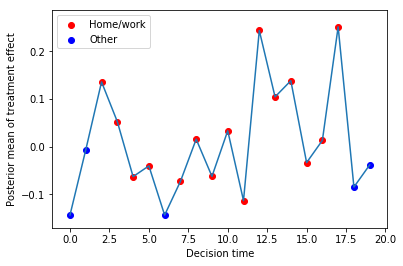

In [123]:
    u = g[3]
    print(u)
    #plt.clf()
    probs,locs = get_f_and_loc( u,by_users)
    probs = probs[-20:]
    locs = locs[-20:]
#print(len(locs))
    clocs = ['r' if l==0 else 'b' for l in locs]
    labels = ['Home/work' if l==0 else 'Other' for l in locs]
    x=plt.scatter([i for i in range(len(probs)) if clocs[i]=='r'],[probs[i] for i in range(len(probs)) if clocs[i]=='r'],c='r' )
    y=plt.scatter([i for i in range(len(probs)) if clocs[i]=='b'],[probs[i] for i in range(len(probs)) if clocs[i]=='b'],c='b' )
    #x=plt.scatter([i for i in range(len(probs))],probs,c=clocs )
    plt.plot(probs)
    plt.ylabel('Posterior mean of treatment effect')
    plt.xlabel('Decision time')
    plt.legend((x,y),('Home/work','Other'),scatterpoints=1,)
    plt.savefig('participant_10355')
    plt.show()
    

In [12]:
def get_all_probs_all_locs():
    ap=[]
    al=[]
    for k,v in lookup.items():
        if v in by_users:
            probs,locs = get_f_and_loc( k,by_users)
            ap.extend(probs)
            al.extend(locs)
    return ap,al

In [15]:
ap,al = get_all_probs_all_locs()

In [16]:
np.mean(np.array([int(ap[i]>0) for i in range(len(ap)) if al[i]==0]))

0.7109144542772862

In [17]:
np.mean(np.array([int(ap[i]>0)  for i in range(len(ap)) if al[i]==1]))

0.5355191256830601